<a href="https://colab.research.google.com/github/pscabral/IFMA_Softex/blob/main/vgg19_fruits01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [4]:
train_dir='/content/produtos/train'
test_dir='/content/produtos/test'

In [5]:
traindf=pd.DataFrame(columns=['img_path','class'])
test_df=pd.DataFrame(columns=['img_path','class'])

In [6]:
traindf = pd.DataFrame(columns=['img_path', 'class'])

for className in os.listdir(train_dir):
    for filename in os.listdir(os.path.join(train_dir, className)):
        img_path = os.path.join(train_dir, className, filename)
        data_to_append = pd.DataFrame({'img_path': [img_path], 'class': [className]})
        traindf = pd.concat([traindf, data_to_append], ignore_index=True)

In [7]:
test_df = pd.DataFrame(columns=['img_path', 'class'])

for className in os.listdir(test_dir):
    for filename in os.listdir(os.path.join(test_dir, className)):
        img_path = os.path.join(test_dir, className, filename)
        data_to_append = pd.DataFrame({'img_path': [img_path], 'class': [className]})
        test_df = pd.concat([test_df, data_to_append], ignore_index=True)


In [8]:
train_df,valid_df=train_test_split(traindf,test_size=0.1,random_state=0)
len(train_df), len(test_df), len(valid_df)

(10608, 1706, 1179)

In [ ]:
print(train_df.info())

In [ ]:
print(train_df.head())

In [ ]:
print(test_df.info())

In [ ]:
print(valid_df.info())

In [ ]:
tf=train_df['class'].value_counts().to_frame().reset_index()
tf.rename(columns={"index": "class", "class": "train_counts"},inplace=True)
tf1=test_df['class'].value_counts().to_frame().reset_index()
tf1.rename(columns={"index": "class", "class": "test_counts"},inplace=True)
tf2=valid_df['class'].value_counts().to_frame().reset_index()
tf2.rename(columns={"index": "class", "class": "valid_counts"},inplace=True)
df=pd.merge(tf,tf1,on='class')
df=pd.merge(df,tf2,on='class')
df

In [ ]:
plt.figure(figsize=(20,30))
g=sns.countplot(y='class',data=train_df)
#g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [ ]:
tf=train_df['class'].value_counts()[:10]
tf=tf.to_frame().reset_index()
tf.rename(columns={"index": "class", "class": "counts"},inplace=True)
plt.figure(figsize=(15,5))
g=sns.barplot(x='class',y='counts',data=tf)

In [ ]:
tf=train_df['class'].value_counts()[-11:-1]
tf=tf.to_frame().reset_index()
tf.rename(columns={"index": "class", "class": "counts"},inplace=True)
plt.figure(figsize=(15,5))
g=sns.barplot(x='class',y='counts',data=tf)

In [ ]:
tf=test_df['class'].value_counts()[:10]
tf=tf.to_frame().reset_index()
tf.rename(columns={"index": "class", "class": "counts"},inplace=True)
plt.figure(figsize=(20,5))
g=sns.barplot(x='class',y='counts',data=tf)

In [ ]:
tf=test_df['class'].value_counts()[-10:-1]
tf=tf.to_frame().reset_index()
tf.rename(columns={"index": "class", "class": "counts"},inplace=True)
plt.figure(figsize=(15,5))
g=sns.barplot(x='class',y='counts',data=tf)

In [ ]:
img_index = 0  # Índice da imagem desejada

if 0 <= img_index < len(train_df):
    img_path = train_df['img_path'].iloc[img_index]
    img = cv2.imread(img_path)

    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        print(f'O tamanho da imagem é {img.shape}')
    else:
        print(f'Não foi possível carregar a imagem em {img_path}')
else:
    print(f'Índice {img_index} fora do intervalo válido para o DataFrame.')

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

for i in range(10):
    rand_int = np.random.randint(0, len(train_df))
    img = cv2.imread(train_df['img_path'].iloc[rand_int])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(train_df['class'].iloc[rand_int])

plt.show()


In [ ]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
g1=sns.histplot(data=img[:,:,0].ravel(),ax=axes[0])
g2=sns.histplot(data=img[:,:,1].ravel(),ax=axes[1])
g3=sns.histplot(data=img[:,:,2].ravel(),ax=axes[2])

In [ ]:
train_df.head(100)

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_dataframe(
dataframe=train_df,
x_col="img_path",
y_col='class',
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",target_size=(224,224))

validation_generator=train_datagen.flow_from_dataframe(
dataframe=valid_df,
x_col="img_path",
y_col='class',
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",target_size=(224,224))

test_generator=test_datagen.flow_from_dataframe(
dataframe=test_df,
x_col="img_path",
y_col='class',
batch_size=1,
seed=42,
shuffle=True,
class_mode="categorical",target_size=(224,224))

In [ ]:
train_generator.image_shape

In [ ]:
img1=train_generator.next()[0]
fig=plt.imshow(img1[0,:,:,:])

In [27]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model
from keras.callbacks import EarlyStopping
import keras

In [28]:
model=VGG16(input_shape=(224,224,3), weights='imagenet')
earlystopping = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=3 )

553467096/553467096 [==============================] - 7s 0us/step


In [29]:
for layer in model.layers[:-1]:
    layer.trainable=False
#for layer in model.layers[15:]:
    #layer.trainable=True

In [ ]:
model.summary()

In [31]:
pretrained_last_layer=model.get_layer(name=model.layers[-2].name)
pretrained_output=pretrained_last_layer.output
next_layer= layers.Dense(33, activation='softmax')(pretrained_output)
pretrained_vgg = Model(model.input, next_layer)

In [ ]:
pretrained_vgg.summary()

In [34]:
pretrained_vgg.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam() ,metrics=['accuracy'])

In [35]:
batch_size=64
history=pretrained_vgg.fit(train_generator,validation_data=validation_generator,epochs=3,callbacks=earlystopping)

Epoch 1/3
332/332 [==============================] - 4421s 13s/step - loss: 1.7033 - accuracy: 0.5946 - val_loss: 0.8231 - val_accuracy: 0.8092
Epoch 2/3
332/332 [==============================] - 4441s 13s/step - loss: 0.5862 - accuracy: 0.8887 - val_loss: 0.4199 - val_accuracy: 0.9075
Epoch 3/3
332/332 [==============================] - 4428s 13s/step - loss: 0.3211 - accuracy: 0.9545 - val_loss: 0.2793 - val_accuracy: 0.9567


In [ ]:
model_finetune=VGG16(input_shape=(224,224,3),include_top=False, weights='imagenet')
print(f'The total number of layers in VGG16 is {len(model_finetune.layers)}.')
print(f'The last layer in model is {model_finetune.layers[-1].name}.')
print(f'The weights upto layer 14 which is {model_finetune.layers[14].name} will remain pretrained. ')
for layer in model_finetune.layers[:15]:
    layer.trainable=False
for layer in model_finetune.layers[15:]:
    layer.trainable=True
model_finetune.summary()

In [42]:
# Salva os pesos do modelo no diretório '/content/' com o nome 'deneme.h5'.
model.save_weights('/content/deneme.h5')

In [46]:
from tensorflow import keras
# Salvar o modelo treinado em um arquivo HDF5
pretrained_vgg.save('modelo_treinado.h5')

# Carregar o modelo a partir do arquivo HDF5
#modelo_carregado = keras.models.load_model('modelo_treinado.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


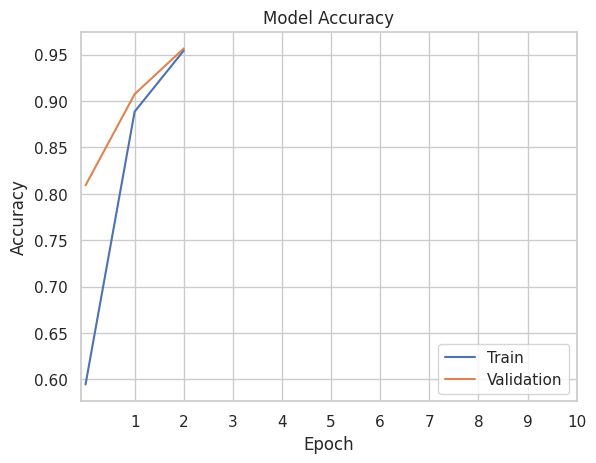

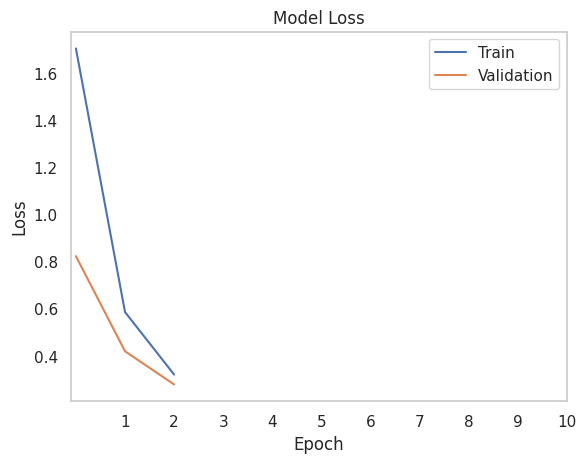

In [50]:
# Plot training curves
plt.grid(which='major', axis='both')
x = [1,2,3,4,5,6,7,8,9,10]

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(x)
plt.legend(['Train', 'Validation'], loc='lower right')
plt.grid(which='major', axis='both')
plt.savefig('fruits_classifier-training_acc.png')
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(x)
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(which='major', axis='both')
plt.savefig('fruits_classifier-training_loss.png')
plt.show()

In [54]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Carregue seus dados de teste (x_test) e rótulos (y_test) aqui
# Substitua as linhas abaixo pelas instruções reais de carregamento dos seus dados:

# x_test = ...
# y_test = ...

# Agora você pode prosseguir com o código de avaliação

print("[INFO] Avaliando os dados de teste")

results = model.evaluate(x=x_test, y=y_test, batch_size=batch_size, verbose=1)
print('Perda de teste, Acurácia de teste: ', [round(r, 4) for r in results])

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

print('Acurácia', round(accuracy_score(y_test, y_pred), 4))
print('Relatório de classificação', classification_report(y_test, y_pred, target_names=class_names))


[INFO] Avaliando os dados de teste


NameError: ignored

In [55]:
import numpy as np

# Suponha que você tenha x_test e y_test carregados de fontes separadas

# x_test e y_test devem ter o mesmo número de amostras
assert len(x_test) == len(y_test)

# Unificar x_test e y_test em um único conjunto de dados de teste
combined_test_data = np.column_stack((x_test, y_test))

# Agora, combined_test_data contém tanto as features (x_test) quanto os rótulos (y_test)

# Se você quiser separar x_test e y_test novamente, você pode fazer o seguinte:
x_test = combined_test_data[:, :-1]  # Obtém todas as colunas, exceto a última
y_test = combined_test_data[:, -1]    # Obtém a última coluna (rótulos)


NameError: ignored

In [52]:
# Plot Testing confusion matrix
cmat = confusion_matrix(np.asarray(y_test), y_pred, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation='vertical', values_format='.2f')
plt.show()

NameError: ignored